\
# Project: Investigate a Dataset - [No-show-appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


> This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment.
A number of characteristics about the patient are included in each row.

>  **'ScheduledDay'**: tells us on what day the patient set up their appointment.

>  **'Neighborhood'**: indicates the location of the hospital.

>  **'Scholarship'**: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.





### Question(s) for Analysis

we will try to understand  what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment



In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline



In [2]:

!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [3]:

df=pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


find the number of patients and thier characteristics

In [4]:
df.shape

(110527, 14)

insect data types and look for instances of missing data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


there is probably a mistak with one of the patients' age it shows -1 year, which does not make sense


### Data Cleaning


we probably won't need the patient ID, appointment ID, scheduled day, and appointment day in our data analysis, so we can drop them

In [7]:

df.drop(['PatientId', 'AppointmentDay', 'ScheduledDay', 'AppointmentID'], axis = 1, inplace=True )
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis





a general look on the data

histgram of whole dataset

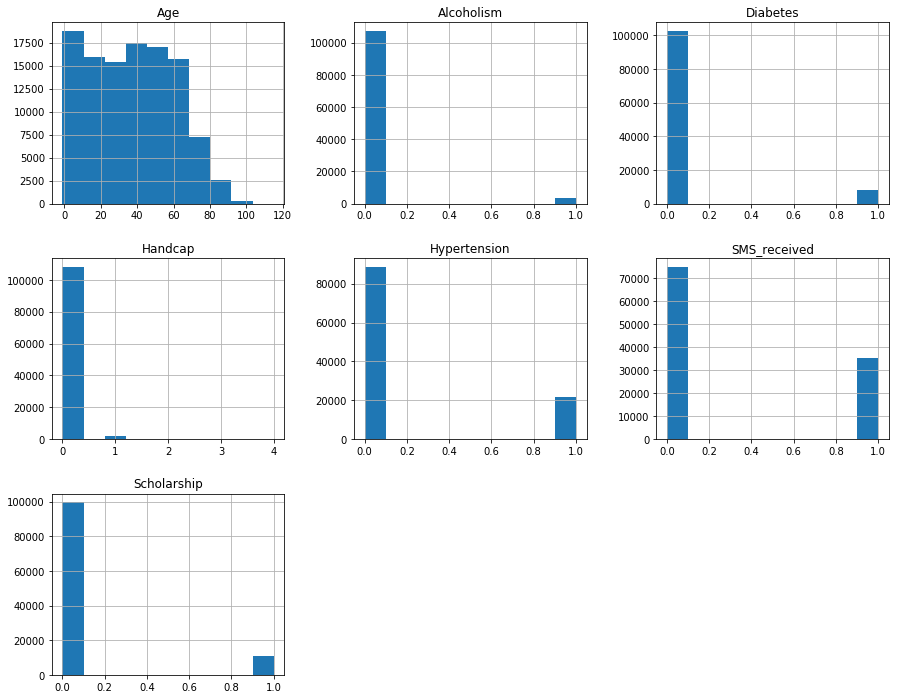

In [10]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize= (15,12));

most of the patients didn't suffer from chronic diseases nor are handicapped

about 18%(20000 out of 110000)suffered from hybertension 

number of patients who received an sms is half the number of those how didn't

about 9% are enrolled in the brasillan welfare program

In [11]:
show = df.No_show == 'No'
noshow = df.No_show == 'Yes'

In [12]:
df[show].count()

Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hypertension     88208
Diabetes         88208
Alcoholism       88208
Handcap          88208
SMS_received     88208
No_show          88208
dtype: int64

In [13]:
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

the number of those who showed at the clinc  was about 4 times those who didn't show

### Research Question 2  (Replace this header name!)

compare those who showed to those who didn't according to Gender

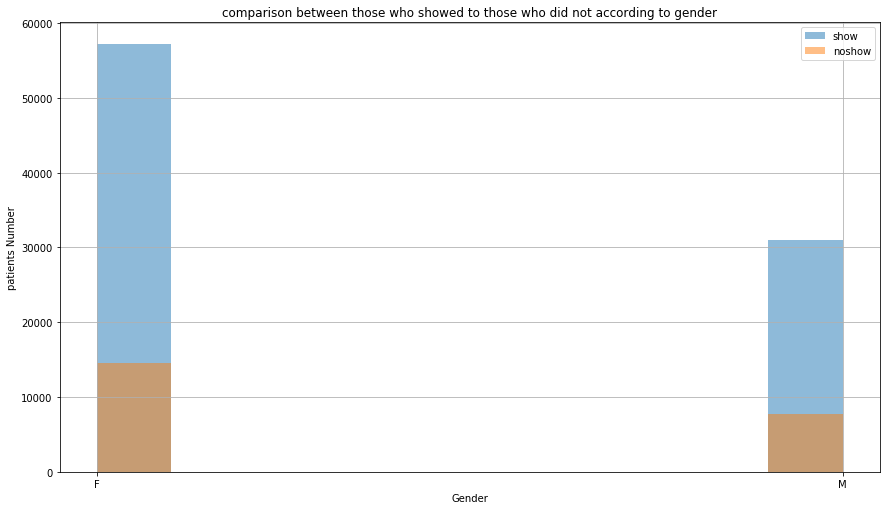

In [14]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.figure(figsize=[14.70, 8.27])
df.Gender[show].hist(alpha = 0.5, label = 'show')
df.Gender[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('comparison between those who showed to those who did not according to gender')
plt.xlabel('Gender')
plt.ylabel('patients Number');

compare those who showed to those who didn't according to Gender

In [15]:
print(df.Gender[show].value_counts())
print(df.Gender[noshow.value_counts()])

F    57246
M    30962
Name: Gender, dtype: int64
88208    F
22319    F
Name: Gender, dtype: object


compare those who showed to those who didn't according to Gender

In [16]:
df.groupby('Gender').No_show.value_counts()

Gender  No_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

Gender is insignificant females who showed were more than males who did and females who did not show were also more than maleswho did not 

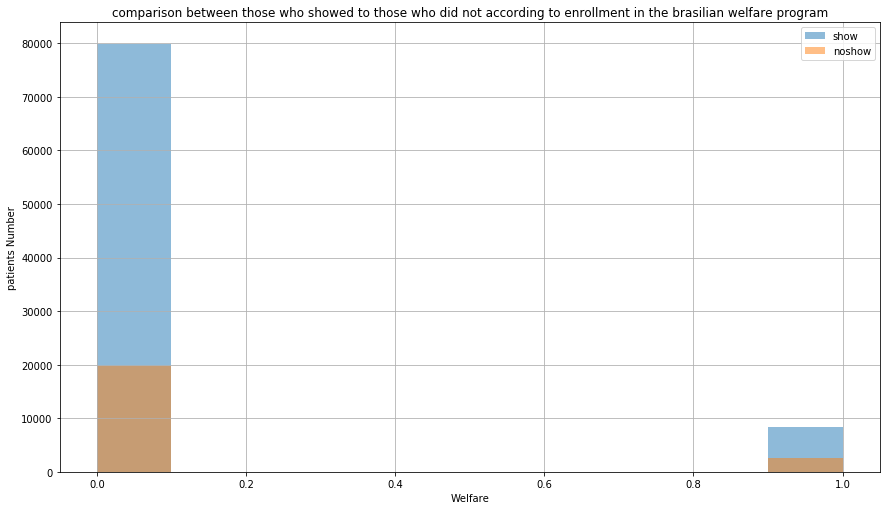

In [25]:
#compare those who showed to those who didn't according to enrollment in the brasilian welfare program

plt.figure(figsize=[14.70, 8.27])
df.Scholarship[show].hist(alpha = 0.5, label = 'show')
df.Scholarship[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('comparison between those who showed to those who did not according to enrollment in the brasilian welfare program')
plt.xlabel('Welfare')
plt.ylabel('patients Number');

In [26]:
print(df.Scholarship[show].value_counts())
print(df.Scholarship[noshow].value_counts())

0    79925
1     8283
Name: Scholarship, dtype: int64
0    19741
1     2578
Name: Scholarship, dtype: int64


being enorlled in the Brasilian welfare program is insignificant

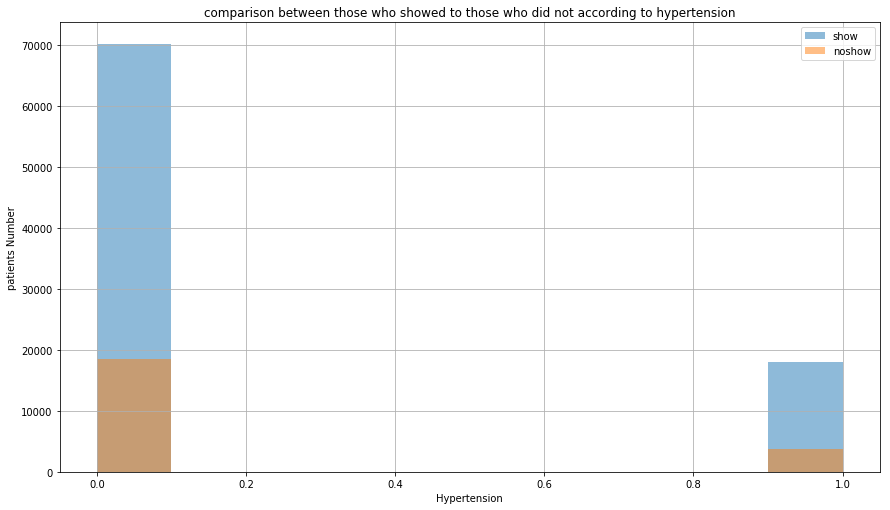

In [27]:
#compare those who showed to those who didn't according to hypertension

plt.figure(figsize=[14.70, 8.27])
df.Hypertension[show].hist(alpha = 0.5, label = 'show')
df.Hypertension[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('comparison between those who showed to those who did not according to hypertension')
plt.xlabel('Hypertension')
plt.ylabel('patients Number');


hypertension is insignificant

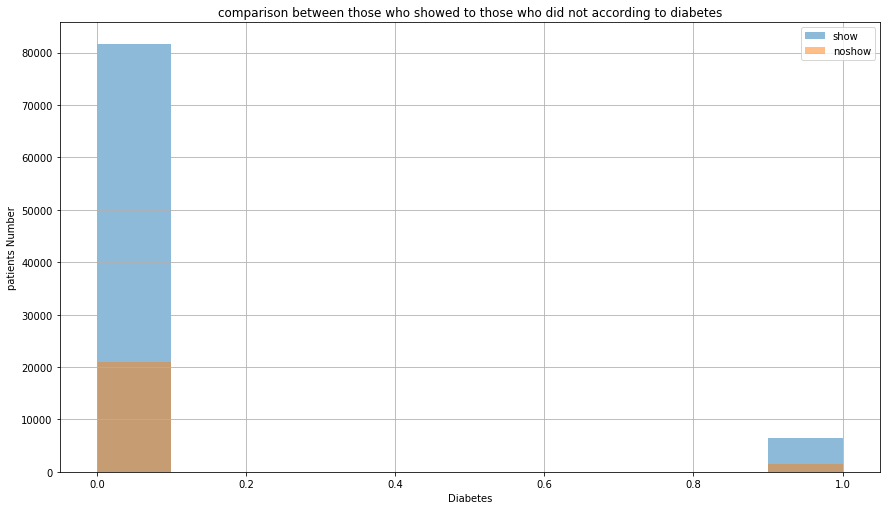

In [33]:
#compare those who showed to those who didn't according to diabetes

plt.figure(figsize=[14.70, 8.27])
df.Diabetes[show].hist(alpha = 0.5, label = 'show')
df.Diabetes[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('comparison between those who showed to those who did not according to diabetes')
plt.xlabel('Diabetes')
plt.ylabel('patients Number');

diabetes is insignificant

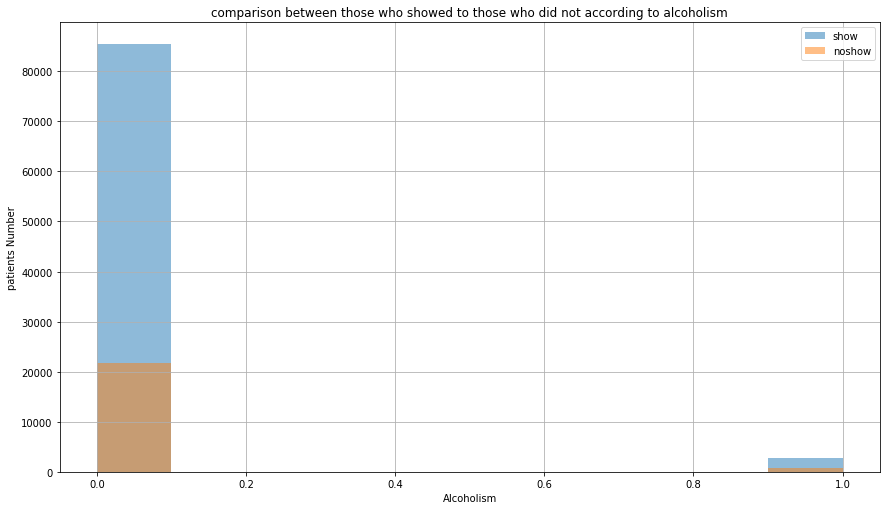

In [34]:
#compare those who showed to those who didn't according to Alcoholism

plt.figure(figsize=[14.70, 8.27])
df.Alcoholism[show].hist(alpha = 0.5, label = 'show')
df.Alcoholism[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('comparison between those who showed to those who did not according to alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('patients Number');

alcoholism is insignificant

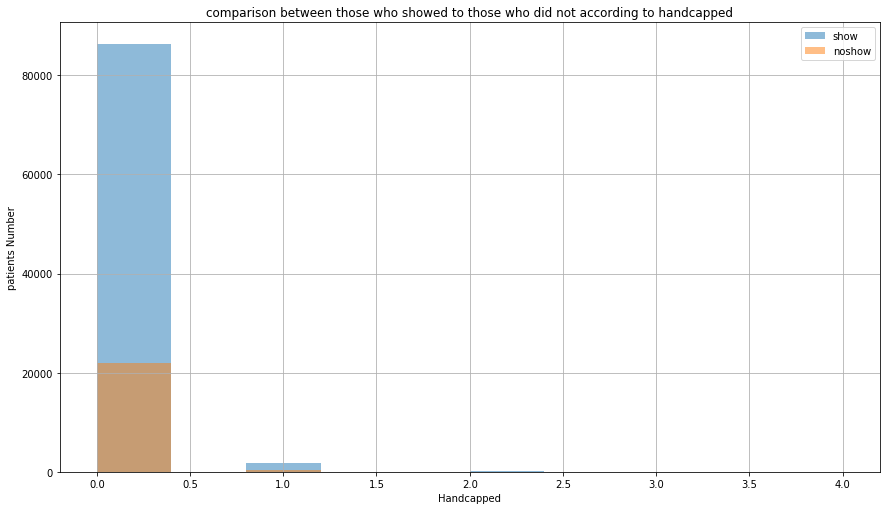

In [35]:
#compare those who showed to those who didn't according to handcapped

plt.figure(figsize=[14.70, 8.27])
df.Handcap[show].hist(alpha = 0.5, label = 'show')
df.Handcap[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('comparison between those who showed to those who did not according to handcapped')
plt.xlabel('Handcapped')
plt.ylabel('patients Number');

handcap is insignificant

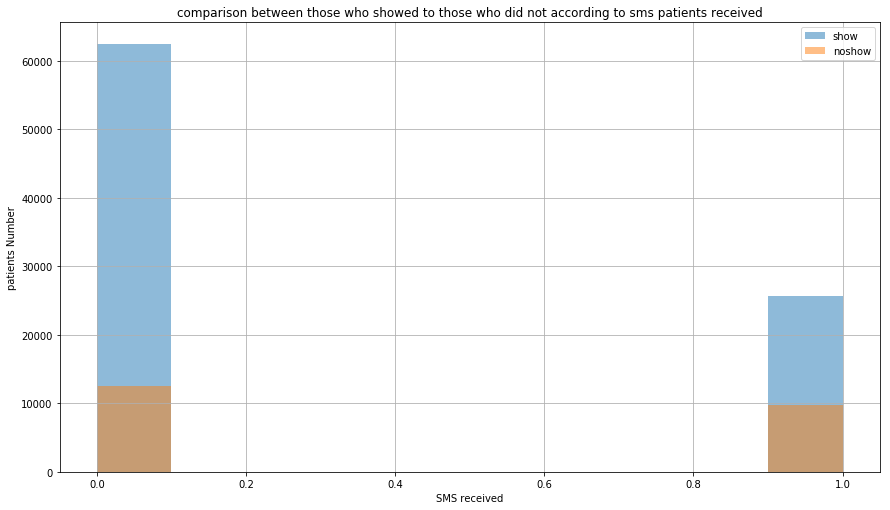

In [36]:
#compare those who showed to those who didn't according to sms patients received

plt.figure(figsize=[14.70, 8.27])
df.SMS_received[show].hist(alpha = 0.5, label = 'show')
df.SMS_received[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('comparison between those who showed to those who did not according to sms patients received')
plt.xlabel('SMS received')
plt.ylabel('patients Number');

it is a bit strange to see that more people showed without receiveing a sms 

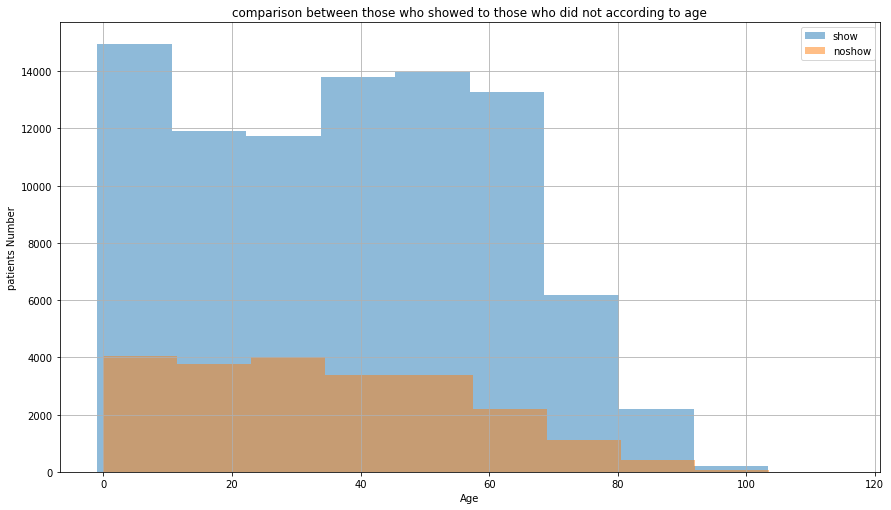

In [37]:
#compare those who showed to those who didn't according to age

plt.figure(figsize=[14.70, 8.27])
df.Age[show].hist(alpha = 0.5, label = 'show')
df.Age[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('comparison between those who showed to those who did not according to age')
plt.xlabel('Age')
plt.ylabel('patients Number');

patients in the age group 0-10 showed more than all the other age groups, followed by the age group 35-70

the older they get the less thy tend to get an appointment

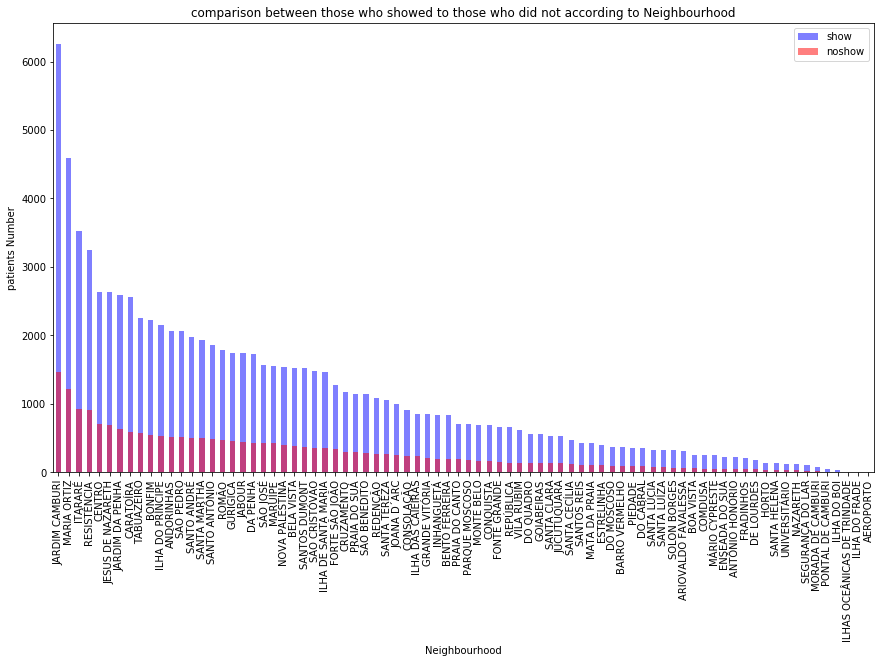

In [38]:
#compare those who showed to those who didn't according to Neighbourhood

plt.figure(figsize=[14.70, 8.27])
df.Neighbourhood[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar', alpha=0.5, color='red', label='noshow')
plt.legend()
plt.title('comparison between those who showed to those who did not according to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('patients Number');

it seems that neiborhood is strongly affecting the showing of patients at the clinic

<a id='conclusions'></a>
## Conclusions



At the end i can say that neighbourhood is strongly related to the patients showing upat the clinc.

age also has it's role as those in the 0-10 age group were the most to show up followed by the age group 35-70

aithough it sounds strange more people showed without receiving a sms 

### Limitations

could not detect direct corrolation between patients showing/no-showing and many characteristics such as gender chronic diseases disabilities

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0